# Binary Classification

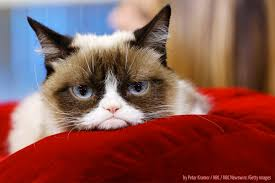

- Um problema simples de classificação binária pode ser o de classificar a imagem a cima como 1 para gato ou 0 para não-gato.
- Seu computador interpreta uma imagem como sendo uma matriz tridimensional

### Notação

A notação utilizada para uma classificação binária é geralmente:
$$(x,y) | x \in \mathbb{R}^{n_x}, y \in {0,1}  $$

Teremos então m exemplos de treino, tal que:
$${(x^1, y^1), (x^2, y^2), ..., (x^m, y^m)}$$ 

Podemos denotar isso também como uma matriz onde o número de colunas da matriz é m e a quantidade de linhas n:
$$ X \in R^{n_x \times m}$$

# Logistic Regression

Dado X, a entrada, se deseja um ý que seja a probabilidade da entrada X ser uma gato, ou seja, $\hat{y} = P(y=1|X)$

Uma abordagem inicial pode ser falar que $\hat{y}$ é do formato:
$$\hat{y} = w^tX + b$$
O problema é que essa abordagem pode retornar valores para ý fora do range probabilistico que estamos trabalhando, 0 a 1.
Podemos então aplicar a função sigmoid, que irá mapear esses valores entre 0 e 1. O gráfico abaixo ilustra a função sigmoid que é expressa como:
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$
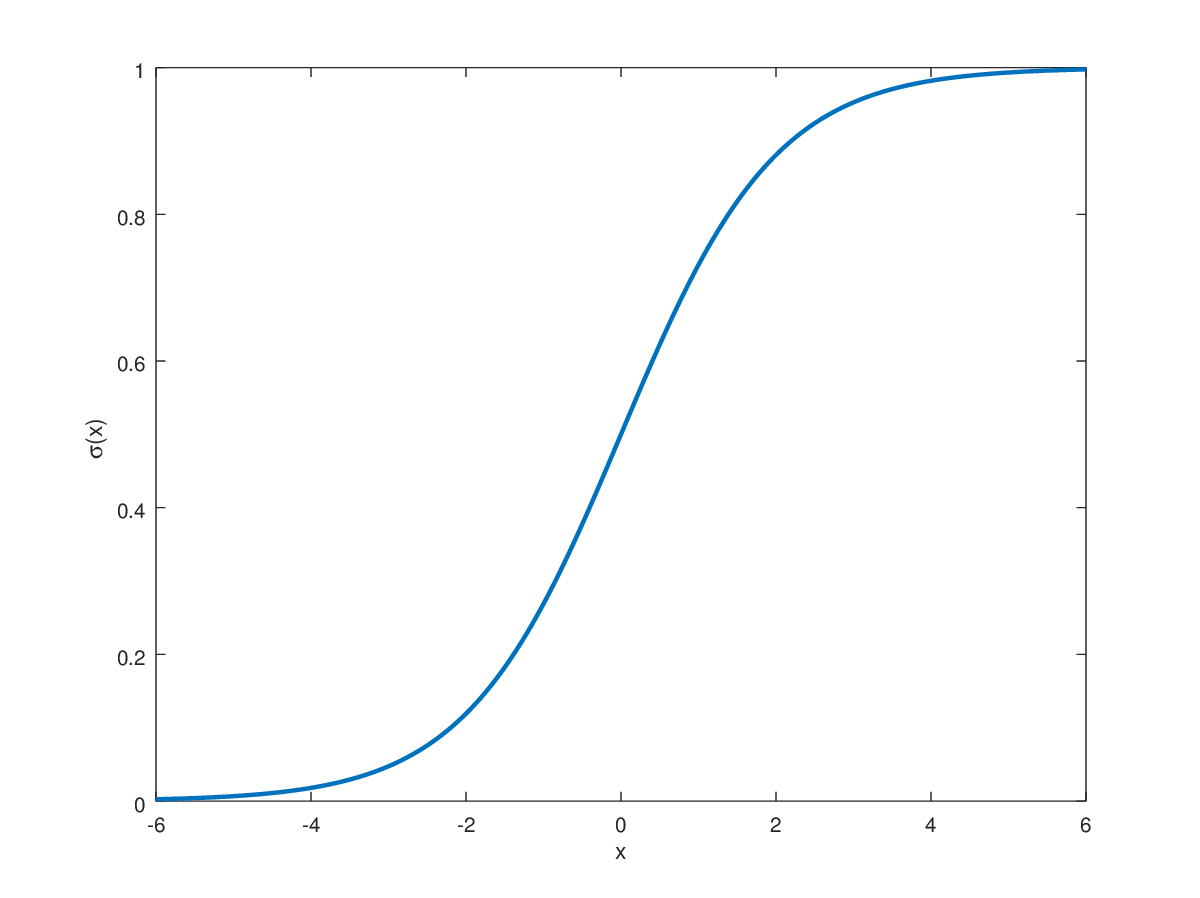

Fica fácil ver que na função sigmoid, quando z é muito alto, o denominador tende a 1, então a função também tenderá a 1. Já para valores muito baixos, o denominador tende a infinito, então a função tende a zero.

A ideia então é implementar um algoritmo de regressão logística para determinar os parâmetros:
$$w \in \mathbb{R}^{n_x}, b \in \mathbb{R}$$

Uma outra notação que pode ser encontrada é onde é determinado um vetor $x_0$, onde seu primeiro valor é o número 1, e seguido do resto dos valores correspondentes a $X$. Nessa notação, $ý$ é escrito como:
$$\hat{y} = \sigma(\theta^TX)$$
$$ \theta = \begin{bmatrix}\theta_0\\ \theta_1\\ \theta_2\\ \vdots \\ \theta_{n_x}\end{bmatrix}$$

Onde $\theta_0$ representa o parâmetro $b$ e o resto representa $w$.

## Loss Function

Para encontrar esses parâmetros $w$ e $b$, é necessário definir uma função de custo.

Nós queremos uma função $\hat{y}$, tal que $\hat{y} = \sigma(w^Tx + b)$, onde $\sigma(z) = \frac{1}{1+e^{-z}}$ e queremos usar essa função para estimar um valor $\hat{y}^i \approx y^i$ baseado num conjunto de dados sobre $x$ e $y$.


A função erro será então denotada pela letra $\mathscr{L}(\hat{y}, y)$ e retornará o erro entre a nossa estimativa, $\hat{y}$, e o valor real, $y$.

Uma das formas que podemos implementar a função de erro é como sendo a média da diferença ao quadrado, $\mathscr{L}(\hat{y}, y) = \frac{(\hat{y} - y)^2}{2}$. No entanto, para o gradient descent que será implementado futuramente, essa função não funciona bem, pois ela gera diversos mínimos locais que podem prender nossa otimização.

A função de erro que usaremos será então $$\mathscr{L}(\hat{y}, y) = -(ylog\hat{y} + (1-y)log(1-\hat{y}))$$

Vamos analisar então o comportamento dessa função, supondo $y=1$, temos
$$\mathscr{L}(\hat{y}, 1) = -log\hat{y}$$

Nesse caso, como queremos que a função retorne o menor valor, queremos então que $\hat{y}$ seja o máximo posível.

Supondo que $y=0$, então:
$$\mathscr{L}(\hat{y}, 0) = -log(1-\hat{y})$$

Já neste caso, como queremos maximizar a função, queremos então que $\hat{y}$ seja o menor possível.

## Cost Function

Essa função de erro mede o erro para uma única amostra, é necessário então uma função chamada *Cost Function* que mede o desempenho de todo conjunto de dados que será definida como:

$$J(w, b) = \frac{1}{m}\sum_{i=1}^m\mathscr{L}(\hat{y}^i, y^i)$$

Quer será a média das funções de erro.

## Gradient Descent

Expandindo a função de custo, temos:
$$J(w, b) = -\frac{1}{m}\sum_{i=1}{^m}y^ilog\hat{y}^i + (1-y^i)log(1-\hat{y}^y)$$

A ideia então, é encontrar os parâmetros $w$ e $b$ que minimizem a função de custo, como ilustra a imagem abaixo
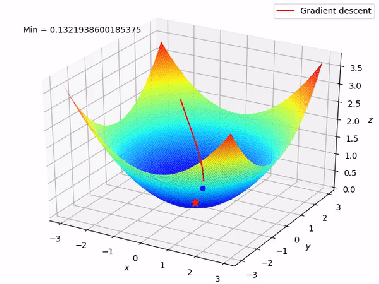

Um fato importante é que muitas vezes o problema não apresenta apenas um mínimo global, pode apresentar vários mínimos locais, mas para regressão logística, geralmente têm-se um problema parecido com o da imagem acima e os valores iniciais não são tão importantes, geralmente (0,0).

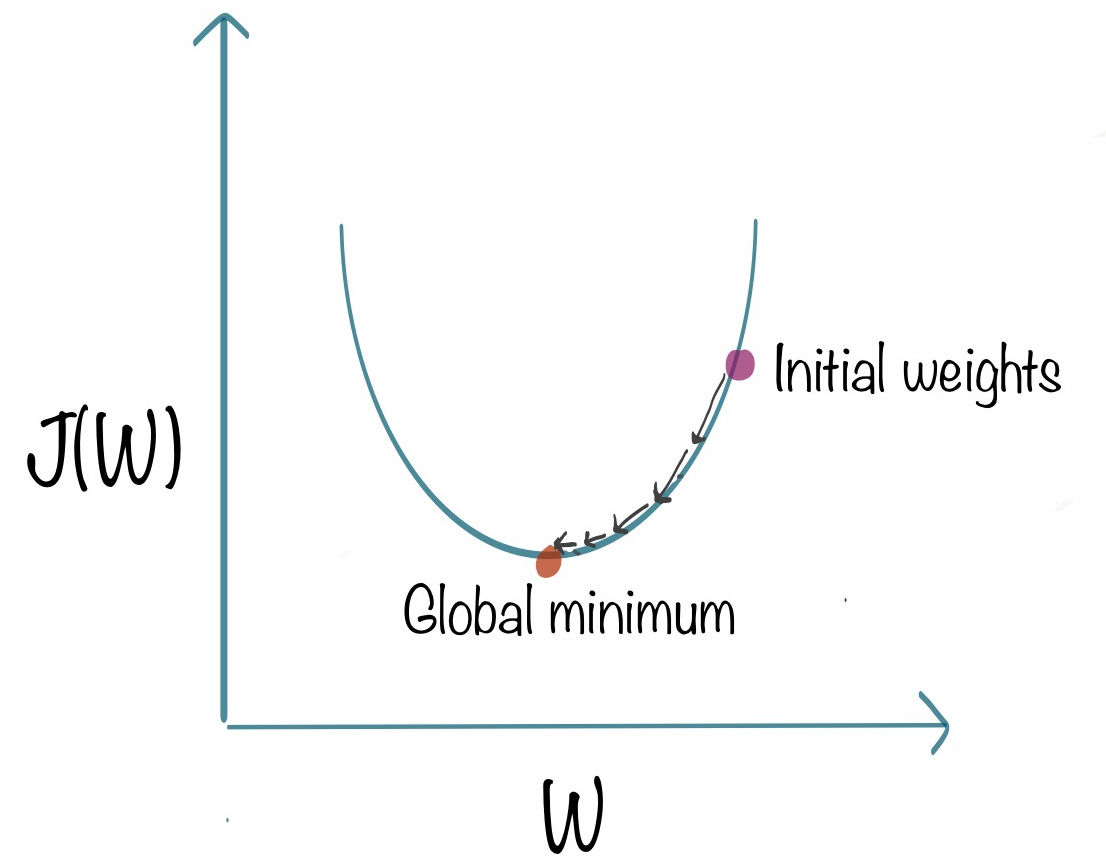

Vamos supor o exemplo acima, onde têm-se uma função $J(w)$ e desejamos minimizar o seu valor. Isso pode ser feito da seguinte forma:
$$w_n = w_{n-1} - \alpha \frac{dJ(w)}{dW}$$

onde $w_n$ representa o novo valor de $w$, $w_{n-1}$ o valor passado, $\alpha$ é o learning rate ou taxa de aprendizado e $\frac{dJ(w)}{dW}$ a derivada no ponto $w$ da função $J(w)$ que representa basicamente a inclinação da função naquele ponto.

Para o nosso caso onde nossa função posusi dois parâmetros, $J(w,b)$, teremos então:
$$w_n = w_{n-1} - \alpha \frac{\partial J(w,b)}{\partial W}$$
$$b_n = b_{n-1} - \alpha \frac{\partial J(w,b)}{\partial b}$$

Para efetuar esta otimização, temos então que derivar a função $J(w,b)$ que é basicamente uma função de $\mathscr{L}(a,y)$, onde $a = \sigma(z)$. 

$$\frac{\partial J(w,b)}{\partial w_i} = \frac{1}{m}\sum_{i=1}^m\frac{\partial \mathscr{L}(a^i,y^i)}{\partial w_i}$$

## Vetorização

Efetuar os cálculos acima dentre de, por exemplo, um loop for, para grandes quantidades de dados, que é onde Machine Learning brilha, seria algo extremamente lento e demorado.

É ai que entra a ideia de vetorização, onde trabalharemos com nossas variáveis como vetores e aplicaremos funções vetoriais como produto escalar e produto vetorial para acelerar os cálculos, por exemplo:

Supondo para a função $z = w^Tx + b$ e diversos valores de $w$ e $x$, uma implementação simples disso seria:
```python
z = 0
for i in range(n):
    z += w[i]*x[i]
z += b
```
Usando vetorização e a biblioteca numpy, podemos fazer então
```python
import numpy as np
z = np.dot(w,x) + b
```

Que é algo bem mais rápido como pode ser visto no exemplo abaixo.

In [27]:
import numpy as np
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()

c = np.dot(a,b)

toc = time.time()

tic1 = time.time()
z = 0
for i in range(1000000):
    z += a[i]*b[i]
toc1 = time.time()

print(c,z)
print(f'Vectorized Version {(toc-tic)*1000}ms')
print(f'Iterative Version {(toc1-tic1)*1000}ms')


249666.7988573052 249666.79885730371
Vectorized Version 0.0ms
Iterative Version 499.9372959136963ms


Assim, a implementação de Logistic Regression de forma vetorizada seria:
```python
Z = np.dot(w.T, X) + b
A = 1/(1+np.exp(-z))
dz = A-Y
dw = 1/m * x * dz.T
db = 1/m * np.sum(dz)
```

## Broadcasting in Python

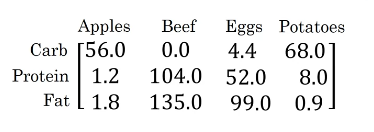

Suponha a tabela acima das calorias de carboidratos, proteínas e gordura de cada uma das 4 comidas para 100g de cada. Ou seja, 100g de maçã possui 59 calorias divididas como 56cal de carboidrato, 1.2cal de proteína e 1.8cal de gordura.

O objetivo é obter o percentual de calorias para cada comida sem usar um loop for.

In [30]:
import numpy as np

A = np.array([[56.0, 0, 4.4, 68.0],
             [1.2, 104.0, 52.0, 8.0],
             [1.8, 135.0, 99.0, 0.9]])
print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [35]:
cal = A.sum(axis=0)
percentage = A*100/cal
print(cal)
print(percentage)

[ 59.  239.  155.4  76.9]
[[94.91525424  0.          2.83140283 88.42652796]
 [ 2.03389831 43.51464435 33.46203346 10.40312094]
 [ 3.05084746 56.48535565 63.70656371  1.17035111]]


In [60]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b
c

array([[-0.02805377,  0.01439923, -0.05626156],
       [-1.1705801 , -1.53226432, -1.09896047],
       [-0.07074487, -2.48311782, -1.08340973]])